In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Unnamed: 0       142193
Date               3436
Location             49
MinTemp             389
MaxTemp             505
Rainfall            679
Evaporation         356
Sunshine            145
WindGustDir          16
WindGustSpeed        67
WindDir9am           16
WindDir3pm           16
WindSpeed9am         43
WindSpeed3pm         44
Humidity9am         101
Humidity3pm         101
Pressure9am         546
Pressure3pm         549
Cloud9am             10
Cloud3pm             10
Temp9am             440
Temp3pm             500
RainToday             2
RainTomorrow          2
dtype: int64


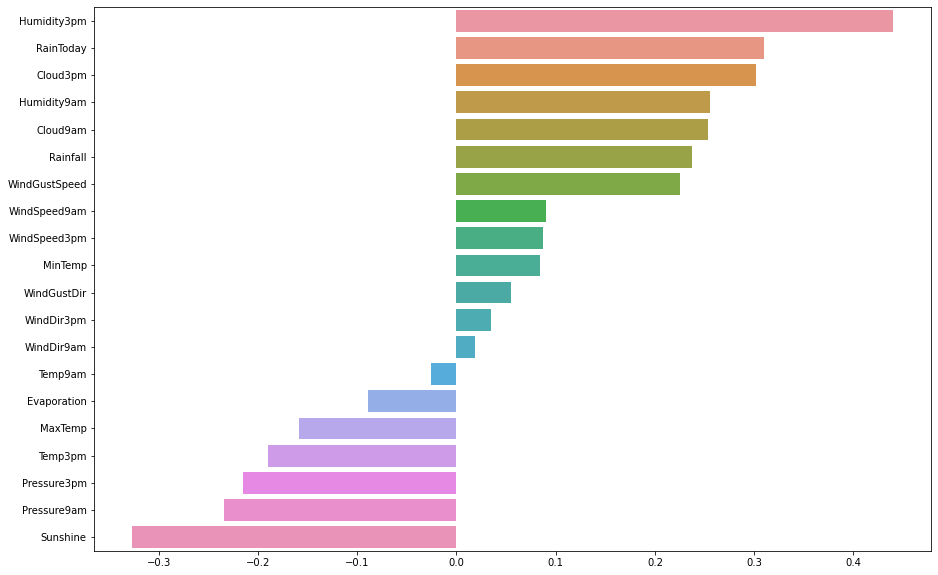

In [4]:
#ПОДГОТОВКА ДАННЫХ
from sklearn.model_selection import train_test_split

X = pd.read_csv('weather.csv')
#Создание выборки ответов
y = X.RainTomorrow.replace({'No':0, 'Yes': 1})
print(X.nunique())
del X['RainTomorrow']

#Удалим ненужные столбцы
del X['Location']
del X['Unnamed: 0']

X.RainToday = X.RainToday.replace({'No' : 0, 'Yes' : 1})

# Закодируем поля направления ветра и преобразуем значение даты
X.Date = pd.to_datetime(X.Date)
le = LabelEncoder()
le.fit(X.WindGustDir)
le.fit(X.WindDir3pm)
le.fit(X.WindDir9am)
X.WindGustDir = le.transform(X.WindGustDir)
X.WindDir3pm = le.transform(X.WindDir3pm)
X.WindDir9am = le.transform(X.WindDir9am)

# Заполним все поля средним значением
numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns
X = X.fillna(numeric_data_mean)

#Найдем корелляции
correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

#Удалим поля которые не оказывают влияние на ответ
del X['WindGustDir']
del X['WindDir9am']
del X['WindDir3pm']
del X['Temp9am']
del X['Date']


<AxesSubplot:xlabel='RainTomorrow', ylabel='Density'>

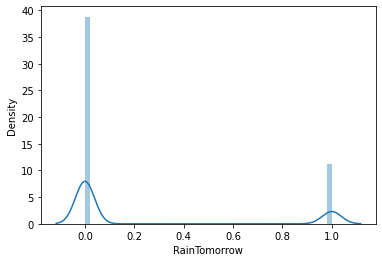

In [416]:
sns.distplot(y)
#Видно что нулевых значений намного больше чем единичных, что может помешать


In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [360]:
def probability(theta, x):
    scalMul = x.dot(theta)
    if scalMul > 5:
        return 1

    if scalMul < -5:
        return 0

    return 1/(1 + np.exp(-scalMul))

In [361]:
def binary_class_prediction(theta, X):
    return np.round(probability(theta, X))

In [413]:
def logloss(pred, label):
    xSize = X.shape[0]
    sumLoss = 0
    for i in range(xSize):
        prob = probability(theta, X[i])
        positivePart = pred[i] * np.log(pred[i])
        negativePart = (1-pred[i]) * np.log(1-pred[i])
        merge = -1 * (negativePart + positivePart)
        sumLoss += mer
    sumLoss /= -xSize
    return sumLoss

theta = np.array([1, 2, 3])

xf = np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
               ])
yf = np.array([1, 1, 0, 0])
print(probability(theta, xf[0]))

1


In [397]:
def gradient(theta, X, y):
    grad = np.zeros_like(theta)
    xSize = X.shape[0]
    for i in range(xSize):
        prob = probability(theta, X[i])
        error = prob - y[i]
        for j in range(grad.size):
            grad[j] += X[i,j]*error

    grad /= xSize
    return grad


[  5.64        10.15         0.           2.54094726   3.04994125
  14.2          4.6          7.          31.2         22.3
 406.47       405.17         1.93115682   1.95095007   9.23
   0.        ]
[-4.73000000e+00 -8.19000000e+00 -2.94997407e-01 -2.12094726e+00
 -2.52745593e+00 -2.02984292e+01 -9.10000000e+00 -7.20000000e+00
 -2.55000000e+01 -2.73000000e+01 -4.05495376e+02 -4.04505820e+02
 -1.64371894e+00 -2.45031669e+00 -7.00000000e+00 -2.23422617e-02]
[8.64000000e+00 1.94200000e+01 2.00000000e-02 5.14792969e+00
 7.32242656e+00 2.48000000e+01 7.10000000e+00 1.10000000e+01
 5.92843810e+01 3.58482606e+01 8.14546128e+02 8.12127461e+02
 3.33115682e+00 2.50126676e+00 1.86200000e+01 0.00000000e+00]
[-6.25000000e+00 -1.12200000e+01 -1.20000000e-01 -1.90094726e+00
 -3.04994125e+00 -1.62000000e+01 -5.70000000e+00 -7.30000000e+00
 -3.80000000e+01 -3.39000000e+01 -5.10660000e+02 -5.09630000e+02
 -2.93115682e+00 -2.95095007e+00 -1.05300000e+01  0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

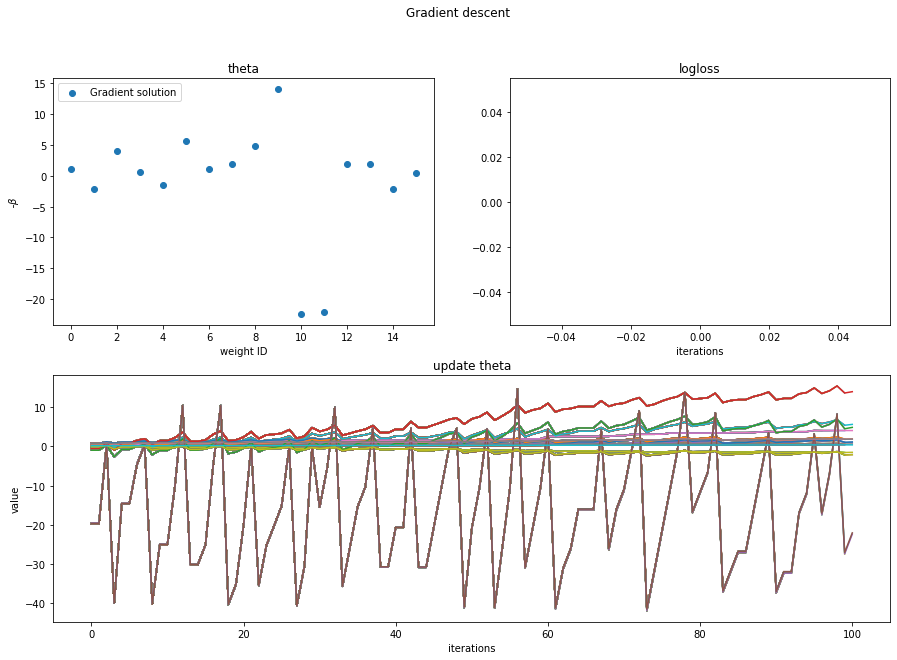

In [398]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)

    errors = []

    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]

    # plt
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')

    for _ in range(iters):

        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)

        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'


        # Обновляем веса

        theta -= grad * h

        theta_history = np.vstack((theta_history, theta))

        # error
        loss = logloss(theta, X, y)
        print(grad)
        errors.append(loss)

        if plot:
            ax1.clear()
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')


            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax3.set_ylabel('loss')
            ax2.set_xlabel('iterations')

            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('iterations')
            time.sleep(0.05)
            fig.canvas.draw()

    return theta
optimal_theta = fit(X_train, y_train)


In [401]:
regress = LogisticRegression()
regress.fit(X_train, y_train)
theta = regress.coef_
sk_theta = np.reshape(theta, (16,1))
optimal_loss = logloss(optimal_theta, X_test, y_test)
sk_loss = logloss(sk_theta, X_test, y_test)
print(sk_theta)
print(optimal_theta)
print(sk_loss)
print(optimal_loss)

[[-0.01256237]
 [ 0.00611716]
 [ 0.02564279]
 [ 0.00976554]
 [-0.12265136]
 [ 0.06264807]
 [-0.0087223 ]
 [-0.02062141]
 [ 0.00586473]
 [ 0.05984837]
 [ 0.09966271]
 [-0.10772006]
 [ 0.0238711 ]
 [ 0.1341844 ]
 [ 0.03645142]
 [ 0.04620944]]
[  1.03409541  -2.07997793   4.07641161   0.63420993  -1.50137449
   5.64914504   1.15862857   1.97124123   4.88287739  14.02376713
 -22.45469829 -22.1186805    1.85681264   1.8815717   -2.10327376
   0.40289804]
[inf]
inf


Pred_sk is [0.85014902] Pred_optimal is 0 Real is 1
Pred_sk is [0.09480113] Pred_optimal is 0 Real is 0
Pred_sk is [0.19889926] Pred_optimal is 0 Real is 1
Pred_sk is [0.44816785] Pred_optimal is 0 Real is 0
Pred_sk is [0.06470004] Pred_optimal is 0 Real is 0
Pred_sk is [0.03907789] Pred_optimal is 0 Real is 0
Pred_sk is [0.08290986] Pred_optimal is 0 Real is 0
Pred_sk is [0.38144764] Pred_optimal is 0 Real is 0
Pred_sk is [0.29690212] Pred_optimal is 0 Real is 0
Pred_sk is [0.05861447] Pred_optimal is 0 Real is 1
Pred_sk is [0.02742641] Pred_optimal is 0 Real is 0
Pred_sk is [0.00953527] Pred_optimal is 0 Real is 0
Pred_sk is [0.13224196] Pred_optimal is 0 Real is 0
Pred_sk is [0.12744657] Pred_optimal is 0 Real is 0
Pred_sk is [0.03928748] Pred_optimal is 0 Real is 0
Pred_sk is [0.07301821] Pred_optimal is 0 Real is 0
Pred_sk is [0.60130427] Pred_optimal is 0 Real is 1
Pred_sk is [0.82410972] Pred_optimal is 0 Real is 1
Pred_sk is [0.10107551] Pred_optimal is 0 Real is 0
Pred_sk is [